# Neural Network
### Mathematical Notation:

$$z = \mathbf{w} \mathbf{x} + b$$
$$a = f(z)$$


In [ ]:
import requests, os, gzip
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist_address = [
    "https://github.com/entropicemergence/tiny_llm_server/releases/download/v0.1.0/t10k-images-idx3-ubyte.gz",
    "https://github.com/entropicemergence/tiny_llm_server/releases/download/v0.1.0/t10k-labels-idx1-ubyte.gz",
    "https://github.com/entropicemergence/tiny_llm_server/releases/download/v0.1.0/train-images-idx3-ubyte.gz",
    "https://github.com/entropicemergence/tiny_llm_server/releases/download/v0.1.0/train-labels-idx1-ubyte.gz"
]


os.makedirs("mnist_data", exist_ok=True)
mnist_folder = "mnist_data"

def download_mnist(address):
    for address in mnist_address:
        response = requests.get(address)
        file_name = address.split("/")[-1]
        path = os.path.join(mnist_folder, file_name)
        with open(path, "wb") as f:
            f.write(response.content)
download_mnist(mnist_address)

In [ ]:
with gzip.open(os.path.join(mnist_folder, "train-labels-idx1-ubyte.gz"), "rb") as f:
    train_labels = np.frombuffer(f.read(), np.uint8, offset=8)
with gzip.open(os.path.join(mnist_folder, "train-images-idx3-ubyte.gz"), "rb") as f:
    train_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)
with gzip.open(os.path.join(mnist_folder, "t10k-labels-idx1-ubyte.gz"), "rb") as f:
    test_labels = np.frombuffer(f.read(), np.uint8, offset=8)
with gzip.open(os.path.join(mnist_folder, "t10k-images-idx3-ubyte.gz"), "rb") as f:
    test_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)

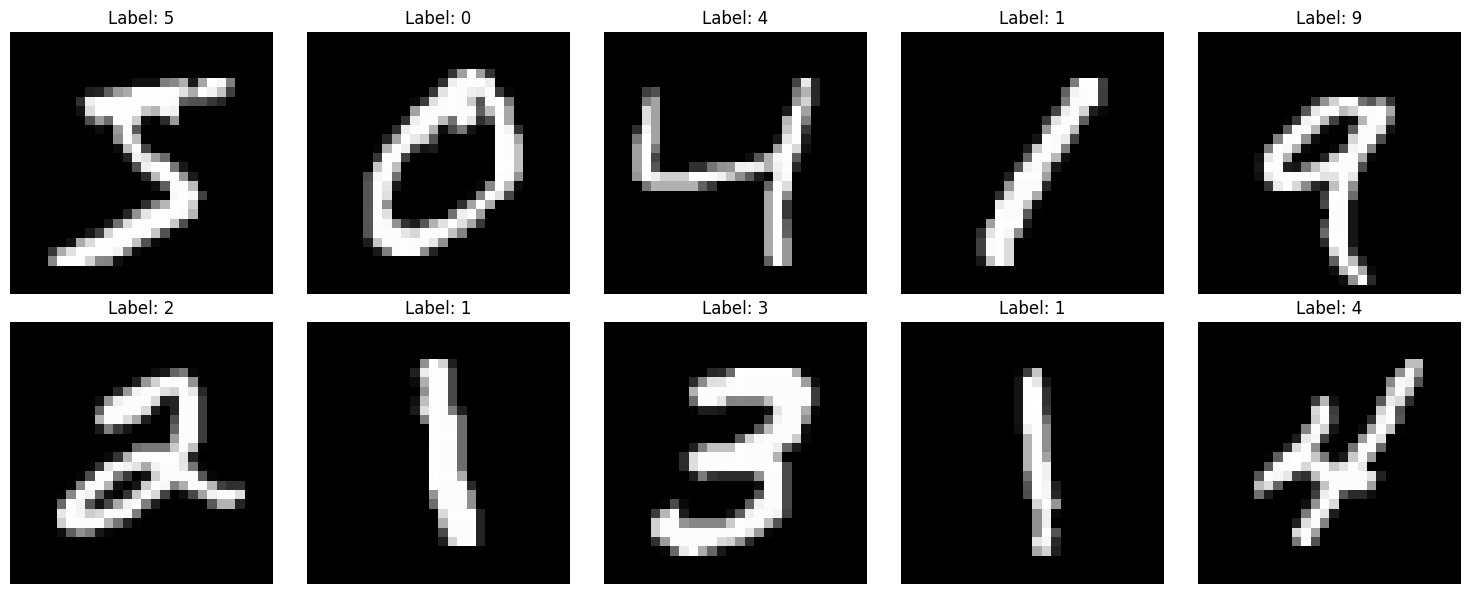

In [28]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    ax[i//5, i%5].imshow(train_images[i], cmap="gray")
    ax[i//5, i%5].set_title(f"Label: {train_labels[i]}")
    ax[i//5, i%5].axis("off")
plt.tight_layout()
plt.show()



In [34]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

# print(train_images[1])
print (test_labels[0:20])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [ ]:

scallar = np.array([1])

vector = np.array([1, 2, 3])

matrix = np.array([[1, 2, 3], [4, 5, 6]])

print(scallar.shape)
print(vector.shape)
print(matrix.shape)

(1,)
(3,)
(2, 3)


In [ ]:
input_size = 10
output_size = 4
w = np.random.randn(output_size, input_size) * np.sqrt(2 / input_size)
print(w)

[[-0.2846782  -0.67549411  0.1338337   0.16644681 -0.02343975 -0.20789632 -0.34941347  0.79924465  0.15780207  0.17874004]
 [ 0.77822982  0.14615012 -0.39072051  0.02124717  0.27813313  0.73578599 -0.51825508 -0.05361861 -0.05678513  0.44004083]
 [ 0.24451309  0.30431141 -0.81218629 -0.31892639  0.17573357  0.21925597  0.05994555  0.67749791  0.17221538 -0.668245  ]
 [ 0.1507664  -0.28852003  0.16982848 -0.81432363 -0.38216022  0.62537315  0.28666117  0.6217326  -0.07566687  0.62452589]]


In [ ]:

from torch._refs import exponential


class LinearLayer():
    def __init__(self, input_size, output_size):
        self.W = np.random.randn(output_size, input_size) * np.sqrt(2 / input_size)
        self.B = np.zeros(output_size)
    def relu_activation(self, input):
        return np.maximum(0, input)
    def forward(self, input):
        output = np.dot(self.W, input) + self.B
        output = self.relu_activation(output)
        return output

class NumpyFullyConnectedNetwork():
    def __init__(self):
        self.layers = []
        self.layers.append(LinearLayer(28 * 28, 196))
        self.layers.append(LinearLayer(196, 32))
        self.layers.append(LinearLayer(32, 10))
    def softmax(self, input):
        exponential = input - np.max(input)
        exponential = np.exp(exponential)
        return exponential / np.sum(exponential)
    def forward(self, input):
        for layer in self.layers:
            input = layer.forward(input)
        return self.softmax(input)
        





In [32]:
print (28*28/4)

196.0


# Fully connected network

https://adamharley.com/nn_vis/mlp/3d.html

# Membuat Neural Network menggunakan pytorch

In [ ]:
## Batch training

# Convolutional Neural Network

https://adamharley.com/nn_vis/cnn/3d.html